# Importing libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
tf.__version__

'2.5.0'

# Creating dataset

In [3]:
from sklearn.datasets import make_circles

In [4]:
n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)
# X : x, y coordinates of points
# y : labels (0, 1)

In [5]:
X.shape, y.shape

((1000, 2), (1000,))

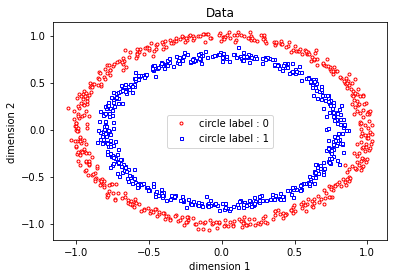

In [53]:
plt.plot(X[y == 0, 0], X[y == 0, 1], 'ro', markerfacecolor='w', markersize=3, label='circle label : 0')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'bs', markerfacecolor='w', markersize=3, label='circle label : 1')
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.title('Data')
plt.legend()
plt.show()

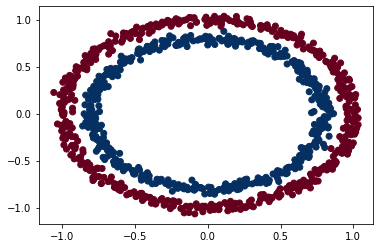

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
plt.show()

# Input, output shapes

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

# Creating the model

In [9]:
tf.random.set_seed(42)

In [56]:
classifier = tf.keras.Sequential(
    [
        tf.keras.layers.InputLayer(2),
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
    ],
    name = "classifier"
)

In [57]:
classifier.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [58]:
history = classifier.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 2.7406 - accuracy: 0.4540
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7203 - accuracy: 0.4720
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.4700
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.4770
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6948 - accuracy: 0.4850
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.4370
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.5160
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6956 - accuracy: 0.5010
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6965 - accuracy: 0.4830
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.4480
Epoch 11/

In [59]:
classifier.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6979 - accuracy: 0.5090


[0.6978930234909058, 0.5090000033378601]

In [67]:
X.shape

(1000, 2)

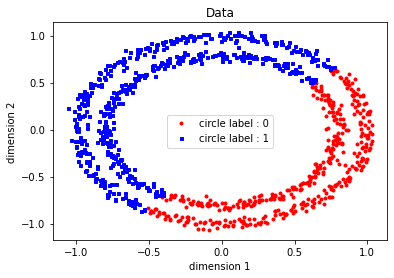

In [60]:
plt.plot(X[(classifier(X) <= 0.5)[:,0], 0], X[(classifier(X) <= 0.5)[:,0], 1], 'ro', markerfacecolor='r', markersize=3, label='circle label : 0')
plt.plot(X[(classifier(X) >  0.5)[:,0], 0], X[(classifier(X) >  0.5)[:,0], 1], 'bs', markerfacecolor='b', markersize=3, label='circle label : 1')
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.title('Data')
plt.legend()
plt.show()